# libraries

In [ ]:
!pip install porespy;
import random
import numba
import math
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# question 1

In [ ]:
ensemble_num=10
k=1  #MB constant
J=1  #interaction constant
h=0  #magnetic field

In [ ]:
def lattice_periodic(n):
  lattice=np.random.choice([1,-1],(n,n))
  return lattice

def M_total_lattice(lattice):
  M=np.abs(np.mean(lattice))
  return  M

def H_total_lattice(lattice):
  rows,columns=np.shape(lattice)
  spins_interaction=0
  mag_field_interaction=0
  for i in range(rows):
    for j in range(columns):
      spins_interaction+=lattice[i][j]*(lattice[(i+1)%rows][j]+lattice[i][(j+1)%columns])
      mag_field_interaction+=lattice[i][j]
  E=-J*spins_interaction-h* mag_field_interaction
  return  E

@njit
def MCMC_part(lattice,lattice_len,MCMC_iteration,T):
    for MCMC in range(MCMC_iteration ):
        for l in range(lattice_len**2):
            i=np.random.randint(0,lattice_len)
            j=np.random.randint(0,lattice_len)
            s_i_old=lattice[i][j]
            sum=lattice[(i+1)%lattice_len][j]+lattice[i-1][j]+lattice[i][(j+1)%lattice_len]+lattice[i][j-1]
            delta_H=(J*sum+h)*2*s_i_old
            random_number=np.random.random()
            if random_number<e**(-(delta_H)/(k*T)):
              lattice[i][j]=-lattice[i][j]
    return lattice

## L = 8

In [ ]:
Temperature=[]
M=[]
X_8=[]
Cv_8=[]
lattice_len=8
MCMC_iteration=lattice_len**2


for T in np.arange(2.7,2,-0.005):
  #print(T)
  ensemble_M=[]
  ensemble_H=[]
  for ensemble in range(ensemble_num):
    #print("ensembel:",ensemble)
    lattice=lattice_periodic(lattice_len)
    lattice=MCMC_part(lattice,lattice_len,MCMC_iteration,T)
    ensemble_M.append(M_total_lattice(lattice))
    ensemble_H.append(H_total_lattice(lattice))
  M_expectation=(np.sum(np.array(ensemble_M)))/ensemble_num
  M2_expectation=(np.sum(np.array(ensemble_M)**2))/ensemble_num
  H_expectation=(np.sum(np.array(ensemble_H)))/ensemble_num
  H2_expectation=(np.sum(np.array(ensemble_H)**2))/ensemble_num
  Temperature.append(T)
  #H.append(H_expectation)
  M.append(M_expectation)
  X_8.append((M2_expectation-(M_expectation)**2)/(k*T))
  Cv_8.append((H2_expectation-(H_expectation)**2)/(k*(T**2)))


In [ ]:
print(" L =", lattice_len, "max of Cv is:", max(Cv_8))
print(" L =", lattice_len, "max of X is:", max(X_8))

 L = 64 max of Cv is: 135.60940519902397
 L = 64 max of X is: 0.047633044554455384


In [ ]:
T=2.7
for i in range(len(Cv_8)):
    Cv=Cv_8[i]
    if(Cv==max(Cv_8)):
        print("for T_critical = ",T,"Cv is:",max(Cv_8))
    T=T-0.005

for T_critical =  2.045000000000014 Cv is: 152.46202497593666


## L = 16

In [ ]:
Temperature=[]
M=[]
X_16=[]
Cv_16=[]
lattice_len=16
MCMC_iteration=lattice_len**2


for T in np.arange(2.7,2,-0.005):
  #print(T)
  ensemble_M=[]
  ensemble_H=[]
  for ensemble in range(ensemble_num):
    #print("ensembel:",ensemble)
    lattice=lattice_periodic(lattice_len)
    lattice=MCMC_part(lattice,lattice_len,MCMC_iteration,T)
    ensemble_M.append(M_total_lattice(lattice))
    ensemble_H.append(H_total_lattice(lattice))
  M_expectation=(np.sum(np.array(ensemble_M)))/ensemble_num
  M2_expectation=(np.sum(np.array(ensemble_M)**2))/ensemble_num
  H_expectation=(np.sum(np.array(ensemble_H)))/ensemble_num
  H2_expectation=(np.sum(np.array(ensemble_H)**2))/ensemble_num
  Temperature.append(T)
  #H.append(H_expectation)
  M.append(M_expectation)
  X_16.append((M2_expectation-(M_expectation)**2)/(k*T))
  Cv_16.append((H2_expectation-(H_expectation)**2)/(k*(T**2)))

In [ ]:
print(" L =", lattice_len, "max of Cv is:", max(Cv_16))
print(" L =", lattice_len, "max of X is:", max(X_16))

 L = 16 max of Cv is: 725.7497537157869
 L = 16 max of X is: 0.042435789419934464


In [ ]:
T=2.7
for i in range(len(Cv_16)):
    Cv=Cv_16[i]
    if(Cv==max(Cv_16)):
        print("for T_critical = ",T,"Cv is:",max(Cv_16))
    T=T-0.005

for T_critical =  2.155000000000012 Cv is: 725.7497537157869


## L = 32

In [ ]:
Temperature=[]
M=[]
X_32=[]
Cv_32=[]
lattice_len=32
MCMC_iteration=lattice_len**2


for T in np.arange(2.7,2,-0.005):
  #print(T)
  ensemble_M=[]
  ensemble_H=[]
  for ensemble in range(ensemble_num):
    #print("ensembel:",ensemble)
    lattice=lattice_periodic(lattice_len)
    lattice=MCMC_part(lattice,lattice_len,MCMC_iteration,T)
    ensemble_M.append(M_total_lattice(lattice))
    ensemble_H.append(H_total_lattice(lattice))
  M_expectation=(np.sum(np.array(ensemble_M)))/ensemble_num
  M2_expectation=(np.sum(np.array(ensemble_M)**2))/ensemble_num
  H_expectation=(np.sum(np.array(ensemble_H)))/ensemble_num
  H2_expectation=(np.sum(np.array(ensemble_H)**2))/ensemble_num
  Temperature.append(T)
  #H.append(H_expectation)
  M.append(M_expectation)
  X_32.append((M2_expectation-(M_expectation)**2)/(k*T))
  Cv_32.append((H2_expectation-(H_expectation)**2)/(k*(T**2)))


In [ ]:
print(" L =", lattice_len, "max of Cv is:", max(Cv_32))
print(" L =", lattice_len, "max of X is:", max(X_32))

 L = 32 max of Cv is: 3366.772177582919
 L = 32 max of X is: 0.03227692402055081


In [ ]:
T=2.7
for i in range(len(Cv_32)):
    Cv=Cv_32[i]
    if(Cv==max(Cv_32)):
        print("for T_critical = ",T,"Cv is:",max(Cv_32))
    T=T-0.005

for T_critical =  2.2200000000000104 Cv is: 3366.772177582919


## L = 64

In [ ]:
Temperature=[]
M=[]
X_64=[]
Cv_64=[]
lattice_len=64
MCMC_iteration=lattice_len**2


for T in np.arange(2.7,2,-0.005):
  #print(T)
  ensemble_M=[]
  ensemble_H=[]
  for ensemble in range(ensemble_num):
    #print("ensembel:",ensemble)
    lattice=lattice_periodic(lattice_len)
    lattice=MCMC_part(lattice,lattice_len,MCMC_iteration,T)
    ensemble_M.append(M_total_lattice(lattice))
    ensemble_H.append(H_total_lattice(lattice))
  M_expectation=(np.sum(np.array(ensemble_M)))/ensemble_num
  M2_expectation=(np.sum(np.array(ensemble_M)**2))/ensemble_num
  H_expectation=(np.sum(np.array(ensemble_H)))/ensemble_num
  H2_expectation=(np.sum(np.array(ensemble_H)**2))/ensemble_num
  Temperature.append(T)
  #H.append(H_expectation)
  M.append(M_expectation)
  X_64.append((M2_expectation-(M_expectation)**2)/(k*T))
  Cv_64.append((H2_expectation-(H_expectation)**2)/(k*(T**2)))

In [ ]:
print(" L =", lattice_len, "max of Cv is:", max(Cv_64))
print(" L =", lattice_len, "max of X is:", max(X_64))

 L = 64 max of Cv is: 14040.46452203446
 L = 64 max of X is: 0.05234036838027268


In [ ]:
T=2.7
for i in range(len(Cv_64)):
    Cv=Cv_64[i]
    if(Cv==max(Cv_64)):
        print("for T_critical = ",T,"Cv is:",max(Cv_64))
    T=T-0.005

for T_critical =  2.290000000000009 Cv is: 14040.46452203446


## heat capacity

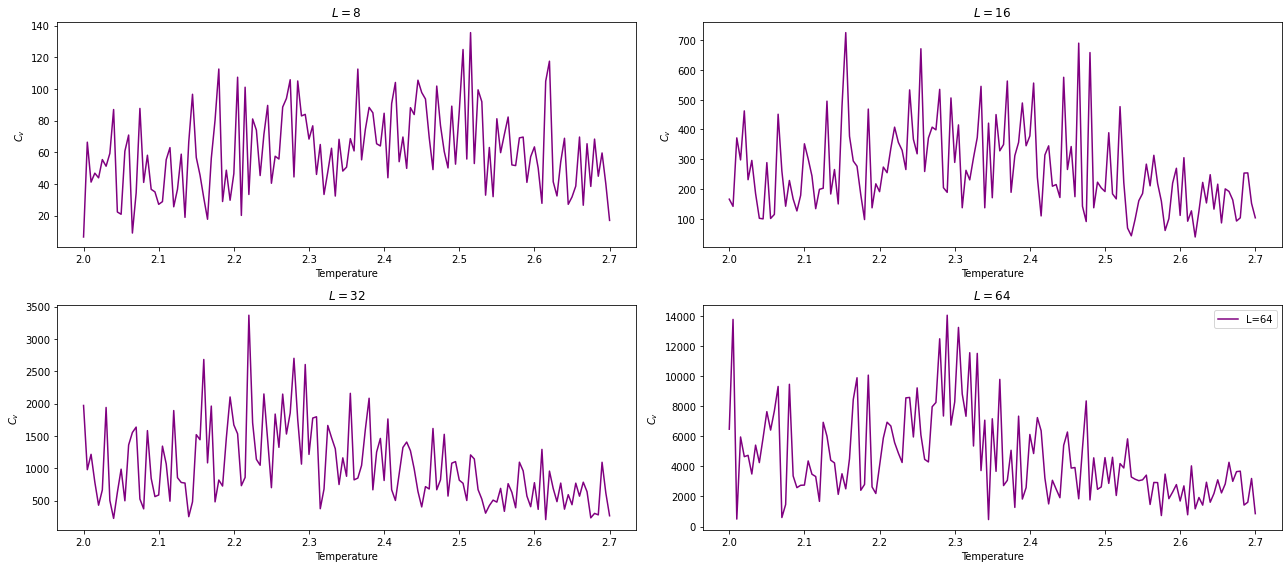

In [ ]:
import seaborn as sns
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)
plt.plot(Temperature,Cv_8,color='purple')
plt.title(r"$L = 8$")
plt.xlabel("Temperature")
plt.ylabel(r'$C_{v}$')

plt.subplot(2,2,2)
plt.plot(Temperature,Cv_16,label='L=16',color = 'purple')
plt.title(r"$L = 16$")
plt.xlabel("Temperature")
plt.ylabel(r'$C_{v}$')

plt.subplot(2,2,3)
plt.plot(Temperature,Cv_32,label='L=32',color='purple')
plt.title(r"$L = 32$")
plt.xlabel("Temperature")
plt.ylabel(r'$C_{v}$')

plt.subplot(2,2,4)
plt.plot(Temperature,Cv_64,label='L=64',color='purple')
plt.title(r"$L = 64$")
plt.xlabel("Temperature")
plt.ylabel(r'$C_{v}$')

plt.tight_layout()
plt.legend()
plt.show()

## susceptibility

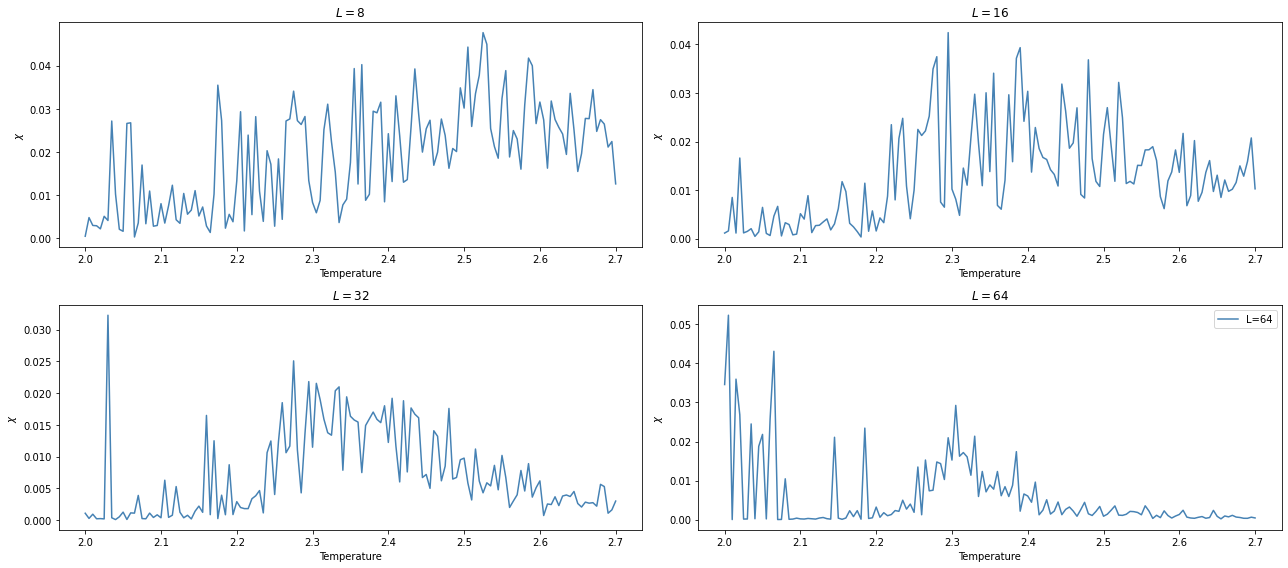

In [ ]:
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)
plt.plot(Temperature,X_8,color='steelblue')
plt.title(r"$L = 8$")
plt.xlabel("Temperature")
plt.ylabel(r'$\chi$')

plt.subplot(2,2,2)
plt.plot(Temperature,X_16,label='L=16',color = 'steelblue')
plt.title(r"$L = 16$")
plt.xlabel("Temperature")
plt.ylabel(r'$\chi$')

plt.subplot(2,2,3)
plt.plot(Temperature,X_32,label='L=32',color='steelblue')
plt.title(r"$L = 32$")
plt.xlabel("Temperature")
plt.ylabel(r'$\chi$')

plt.subplot(2,2,4)
plt.plot(Temperature,X_64,label='L=64',color='steelblue')
plt.title(r"$L = 64$")
plt.xlabel("Temperature")
plt.ylabel(r'$\chi$')

plt.tight_layout()
plt.legend()
plt.show()

## computing exponents

### nou

In [ ]:
Tc1=2.045000000000014
Tc2= 2.155000000000012
Tc3=2.2200000000000104
Tc4=2.290000000000009
ln_T=[np.log(abs(Tc1-2.26918531421)),np.log(abs(Tc2-2.26918531421)),np.log(abs(Tc3-2.26918531421)),np.log(abs(Tc4-2.26918531421))]
ln_L =[np.log(8),np.log(16),np.log(32),np.log(64)]

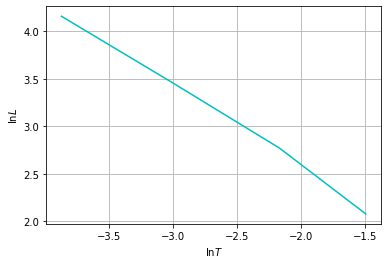

In [ ]:
plt.plot(ln_T,ln_L,'c')
plt.xlabel(r"$\ln{T}$")
plt.ylabel(r"$\ln{L}$")
plt.grid()
plt.show()

In [ ]:
nou =(np.log(16)-np.log(8))/(np.log(abs(Tc2-2.26918531421))-np.log(abs(Tc1-2.26918531421)))
print(" nou = {:.4f}".format(abs(nou)))

 nou = 1.0274


### alpha

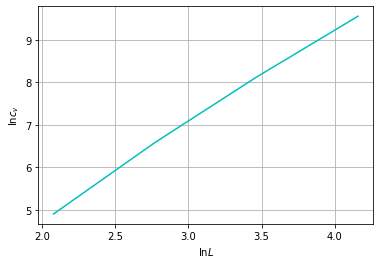

In [ ]:
ln_Cv=[np.log(max(Cv_8)),np.log(max(Cv_16)),np.log(max(Cv_32)),np.log(max(Cv_64))]
ln_L =[np.log(8),np.log(16),np.log(32),np.log(64)]

plt.plot(ln_L,ln_Cv,'c')
plt.xlabel(r"$\ln{L}$")
plt.ylabel(r"$\ln{c_{v}}$")
plt.grid()
plt.show()

In [ ]:
slope1 = np.polyfit(ln_L,ln_Cv, 1)[0]
slope1 # alpha / nou

2.2295790868720617

In [ ]:
alpha = slope1 * nou
print(" alpha = {:.4f}".format(abs(alpha)))

 alpha = 2.2907


### gamma

In [ ]:
ln_L =[np.log(8),np.log(16),np.log(32)]
ln_X =[abs(np.log(max(X_8))),abs(np.log(max(X_16))),abs(np.log(max(X_32)))]

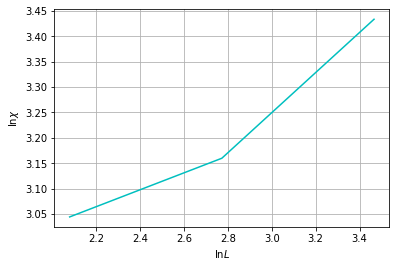

In [ ]:
plt.plot(ln_L,ln_X,'c')
plt.xlabel(r"$\ln{L}$")
plt.ylabel(r"$\ln{\chi}$")
plt.grid()
plt.show()

In [ ]:
slope2 = np.polyfit(ln_L,ln_X, 1)[0]
slope2 # gamma / nou

0.2692250333964597

In [ ]:
gamma = slope2 * nou
print(" gamma = {:.4f}".format(abs(gamma)))

 gamma = 0.2766
